In [1]:
import math
import copy
import itertools
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
%matplotlib inline
from sklearn.neighbors import NearestNeighbors

In [4]:
thetas = np.load('../data/thetas/thetas_parameterized.npy')
print(thetas.shape)

n_thetas = len(thetas)
theta1 = 708
theta_test = 213
theta_observed = 0
theta_score = 0 # for local model
thetas_train = list(range(17,1017))
thetas_test = list(range(17))
n_randomthetas = 100

nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(thetas)

(1017, 2)


# Load data

In [9]:
#weighted_data = pd.read_csv('/scratch/jb6504/eft-data/wbf_4l_supernew.dat', sep='\t', dtype=np.float32)
weighted_data = pd.read_csv('../data/events/wbf_4l_supernew.dat', sep='\t', dtype=np.float32)

# Compare random thetas to nearest regular thetas

In [10]:
p_rt_list = []
p_nt_list = []
t0_rt_list = []
t0_nt_list = []
t1_rt_list = []
t1_nt_list = []

sample = weighted_data.sample(100)

for index, row in sample.iterrows():
    #print ''
    #print 'Event', index
    
    for rt in range(n_randomthetas):
        
        rtheta = np.asarray( [row['randomtheta_' + str(rt) + '_0'], row['randomtheta_' + str(rt) + '_1']] )
        distances, indices = nbrs.kneighbors([rtheta])
        nt = indices[0][0]
        dist = distances[0][0]
        ntheta = thetas[nt]
        
        p_rt = row['p_randomtheta_' + str(rt)]
        t0_rt = row['score_randomtheta_' + str(rt) + '_0']
        t1_rt = row['score_randomtheta_' + str(rt) + '_1']
        p_nt = row['p_theta_' + str(nt)]
        t0_nt = row['score_theta_' + str(nt) + '_0']
        t1_nt = row['score_theta_' + str(nt) + '_1']
        
        p_rt_list.append(p_rt)
        t0_rt_list.append(t0_rt)
        t1_rt_list.append(t1_rt)
        p_nt_list.append(p_nt)
        t0_nt_list.append(t0_nt)
        t1_nt_list.append(t1_nt)
        
        #print rtheta, ntheta, dist, p_rt, p_nt

Text(0,0.5,'log p (nearest regular theta)')

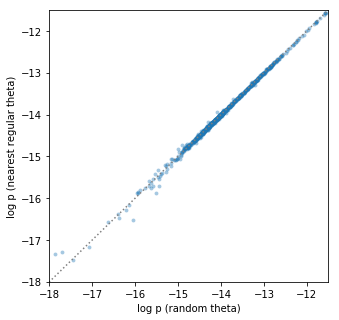

In [11]:
plt.figure(figsize=[5.,5.])
plt.plot([-25.,-10.], [-25.,-10.],ls=':',c='0.5')
plt.scatter(np.log(p_rt_list)[::10],np.log(p_nt_list)[::10],lw=0.,alpha=0.4,s=15.)
plt.xlim(-18.,-11.5)
plt.ylim(-18.,-11.5)
plt.xlabel('log p (random theta)')
plt.ylabel('log p (nearest regular theta)')

/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log


Text(0,0.5,'$t_1$ (nearest regular theta)')

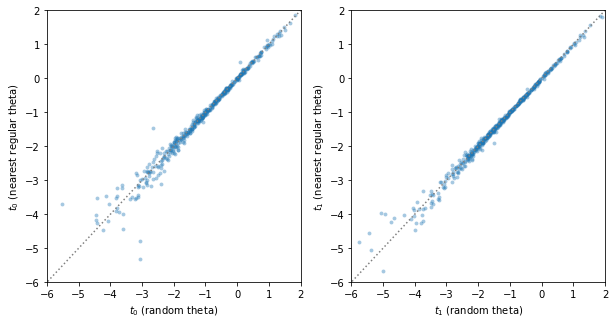

In [12]:
plt.figure(figsize=[10.,5.])

plt.subplot(1,2,1)
plt.plot([-25.,25.], [-25.,25.],ls=':',c='0.5')
plt.scatter(np.log(t0_rt_list)[::10],np.log(t0_nt_list)[::10],lw=0.,alpha=0.4,s=15.)
plt.xlim(-6.,2.)
plt.ylim(-6.,2.)
plt.xlabel(r'$t_0$ (random theta)')
plt.ylabel(r'$t_0$ (nearest regular theta)')

plt.subplot(1,2,2)
plt.plot([-25.,25.], [-25.,25.],ls=':',c='0.5')
plt.scatter(np.log(t1_rt_list)[::10],np.log(t1_nt_list)[::10],lw=0.,alpha=0.4,s=15.)
plt.xlim(-6.,2.)
plt.ylim(-6.,2.)
plt.xlabel(r'$t_1$ (random theta)')
plt.ylabel(r'$t_1$ (nearest regular theta)')